<h2>What is Chat-GPT?</h2>

With the recent release of Chat GPT-4, many people are enthralled by the programs capabilities, and many are also expressing concerns regarding the implications that come with releasing a powerful AI open to use to anyone and everyone who desire it. What exactly is Chat-GPT? Chat GPT is an Artificial Intelligence chat bot developed and released by OpenAI, a research team of scientists and engineers working to further develop the capabilities of artificial intelligence. According to OpenAI Chat-GPT is powered by a deep learning model, which is a type of neural network designed to process and generate language. GPT learns by being fed large amounts of data and text which it processes and ‘learns’ to discuss and generate answers about that data in the same context in which it took in that data. 

<h2>Why is it important to discuss?</h2>

The advancement of powerful natural language processing technology has come rapidly, opening up possibilities for its users and empowering people to do more with their computers. Chat-GPT 4 has been used to aid education, programming work, day-to-day inquiries, and can even be used for data analysis. Recently, the AI powering Chat GPT-4 has been used to code entire programs, and even create falsified videos and audio files. While the capabilities of the new AI are certainly incredible, its release to the public in the form of a chat-bot has also caused concern amongst many. Some concerns include its unlimited access to information that can out match a human counterpart easily, and scifi-like concerns about its ability to become more powerful than humans and overpower us. While AI sounds like something that is bound to a computer screen, many governments, such as Germany, have started drafting legislation in response to the development of AI’s such as Chat-GPT 4. Powerful AIs, such as Chat-GPT are here and how it is perceived and used everyday will dictate how we move forward with the new technology. 


<h2>Purpose</h2>

The Purpose of this tutorial is to analyze the sentiments surrounding recent advancements in AI technology and determine the general attitude towards AI technology, such as Chat-GPT. Understanding this sentiment is crucial in guiding our future course of action for the development and release of subsequent AI tools, as well as the formulations of relevant policies that aim to mitigate potential risks associated with AI


<h2>Data Collection</h2>

With Chat-GPT arguably being one of the most popular and most discussed releases of AI software in recent history we decided to center our data collection around tweets from the popular social media platform Twitter. Specifically, we focused on tweets containing the hashtag '#ChatGPT' starting from the initial launch of the OpenAI chatbot in November 2022 until April 7th, 2023. Our analysis revolves around the tweet's contents, the number of likes it received, and the number of retweets it accumulated. By assessing the overall sentiment of each tweet as either positive or negative, we aim to determine the general perception of Twitter users regarding Chat-GPT.

<h2>Imports</h2>

In [48]:
#Add imports
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

## Collecting Data

In [ ]:
#read tweets into dataframe
df = pd.read_csv("archive/ChatGPT.csv",low_memory=False)

#remove unneccessary columns (subject to change)
df.drop(columns=['Unnamed: 0', 'Location', 'Description'], axis=1, inplace=True)

df.head()

## Data Processing

### Format Date Field

In [ ]:
#create datetime column for date
df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

## Tweet Volume Over Time

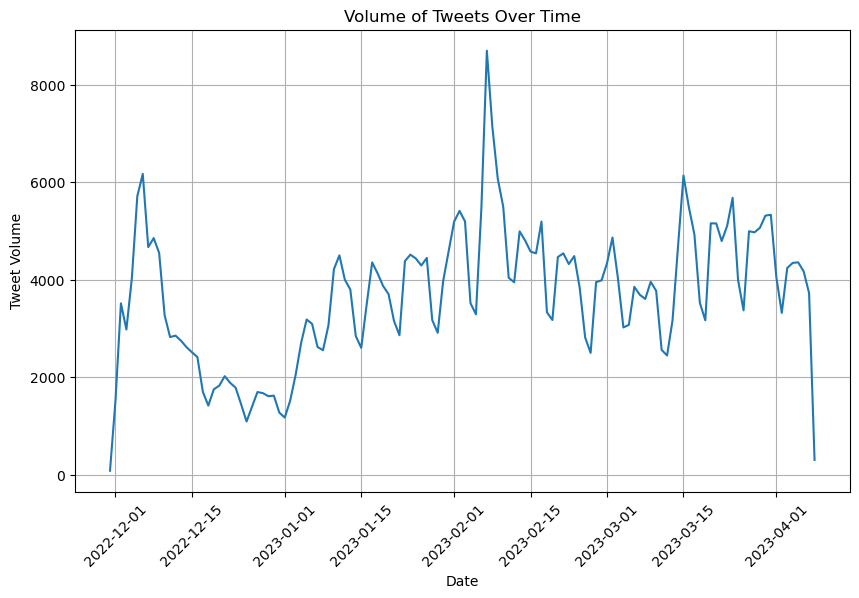

In [34]:
# Group by date and count the tweets
tweets_by_date = df.groupby('Date')['Tweet'].count()

# Create a line chart of the volume of tweets over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_by_date.index, tweets_by_date)
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Volume of Tweets Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Finding the attidue of tweets

In [ ]:
#create fucntion using textblob to gauge attitudes
def get_attitudes(tweet):
    result = tb(tweet)
    attitude = result.sentiment.polarity
    return attitude

In [ ]:
#get the attitude score for each tweet
df['Tweet'] = df['Tweet'].astype(str)
df['Attitudes'] = df['Tweet'].apply(get_attitudes)
df.head()

### Normalize attiudes so we can compare more easily

In [ ]:
#normalize attitude scores
# Create a MinMaxScaler object
scalar = MinMaxScaler()

# Reshape the attitude scores
attitude_scores = df['Attitudes'].values.reshape(-1, 1)

# Perform the Min-Max scaling on the attitude scores
normalized_scores = scalar.fit_transform(attitude_scores)

# Update the column in the DataFrame with the normalized scores
df['Normalized_Attitudes'] = normalized_scores

### Classify Attitudes Into Positive, Negative, and Neutral

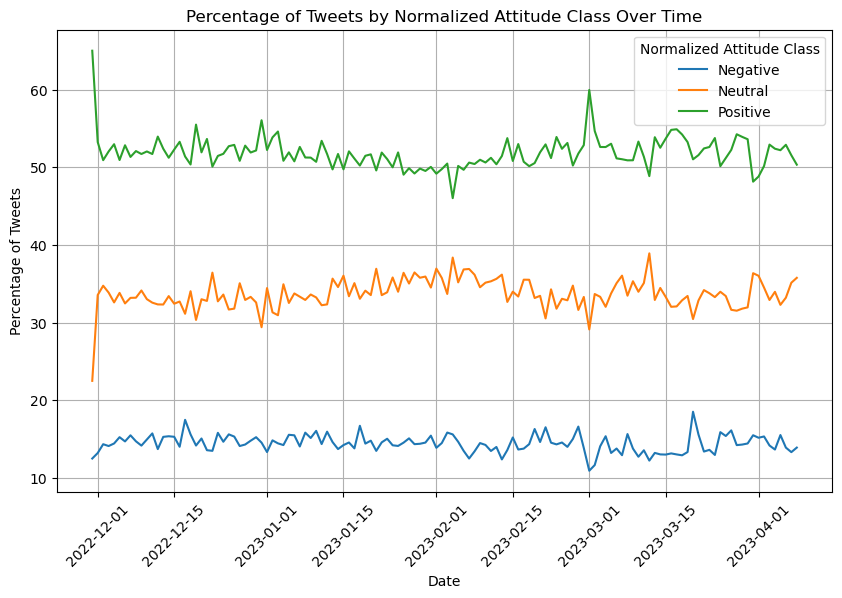

In [59]:
#Group attitudes into positive, negative, and neutral based on normalized attitudes 
def classify_normalized_attitude(attitude):
    if attitude < 0.5:
        return 'Negative'
    elif attitude > 0.5:
        return 'Positive'
    else:
        return 'Neutral'
df['Normalized_Attitude_Class'] = df['Normalized_Attitudes'].apply(classify_normalized_attitude)

# Group by date and attitude class, then count the tweets
tweets_by_date_attitude = df.groupby(['Date', 'Normalized_Attitude_Class'])['Tweet'].count().unstack()

# Calculate the total number of tweets per day
daily_total_tweets = tweets_by_date_attitude.sum(axis=1)

# Calculate the percentage of tweets for each attitude class
tweets_percentage_by_date_attitude = tweets_by_date_attitude.div(daily_total_tweets, axis=0) * 100

# Create a line chart of the percentage of tweets by attitude class over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_percentage_by_date_attitude)
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.title("Percentage of Tweets by Normalized Attitude Class Over Time")
plt.xticks(rotation=45)

plt.legend(['Negative', 'Neutral', 'Positive'], title='Normalized Attitude Class')
plt.grid()
plt.show()

### Give weights to likes an retweets sto give popularity score

In [ ]:
# Define weights to likes and retweets
like_weight = 0.5
rt_weight = 0.2

#convert likes and retweets to numeric values
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').fillna(0)

#calculated weighted scores
popularity = pd.DataFrame()
popularity['weighted_likes'] = df['Likes'] * like_weight
popularity['weighted_rt'] = df['Retweets'] * rt_weight

#get overall popularity score
df['Popularity_Score'] = popularity['weighted_likes'] + popularity['weighted_rt']

# Calculate the weighted score by multiplying the attitude score with the popularity score
df['weighted_score'] = df['Normalized_Attitudes'] * df['Popularity_Score']

df.tail()


## Plotting ditribution of attitude scores

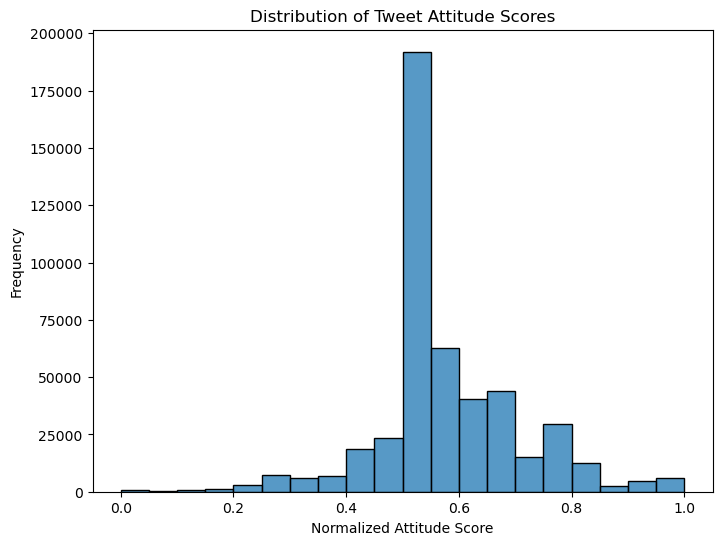

In [35]:
#plot the results
# Plot the distribution of tweet attitude scores
plt.figure(figsize=(8, 6))
sns.histplot(df['Normalized_Attitudes'], bins=20)
plt.xlabel('Normalized Attitude Score')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Attitude Scores')
plt.show()

### Create Feature for Month/Year

In [ ]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# #filter out the day portion of the date column for easier grouping
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')

df.head()


## Violin plot of attutudes over time

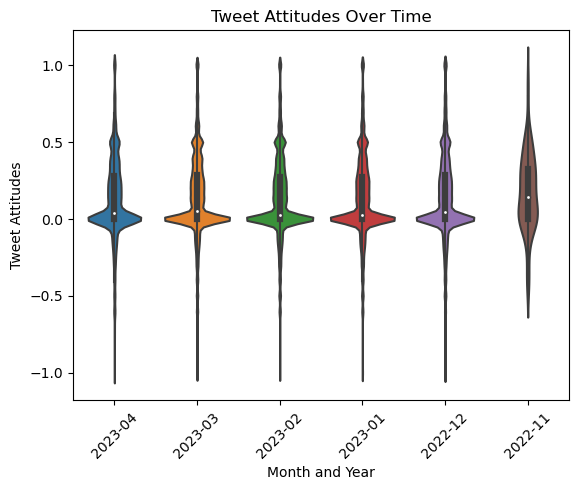

In [40]:
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

sns.violinplot(x='Month_Year', y='Attitudes', data=df)
plt.xticks(rotation=45)
plt.xlabel('Month and Year')
plt.ylabel('Tweet Attitudes')
plt.title('Tweet Attitudes Over Time')
plt.show()

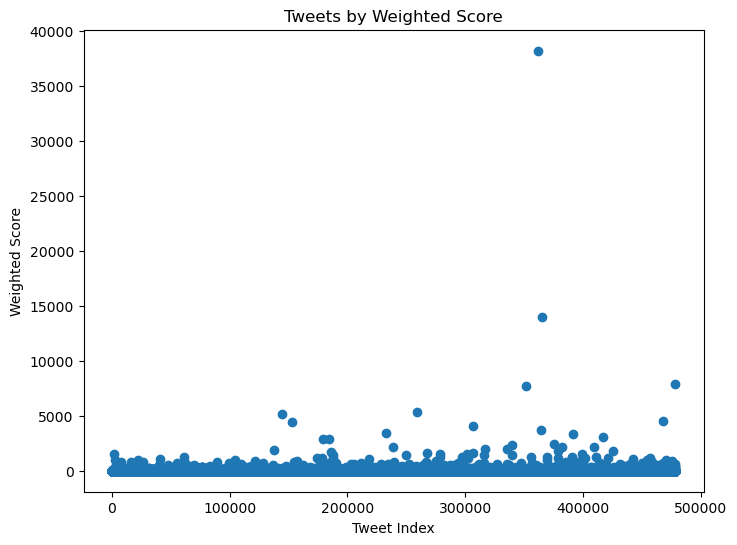

In [43]:
# Plot tweets by weighted score
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['weighted_score'])
plt.xlabel('Tweet Index')
plt.ylabel('Weighted Score')
plt.title('Tweets by Weighted Score')
plt.show()

## Correlation plot 

/tmp/ipykernel_5042/1214853836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

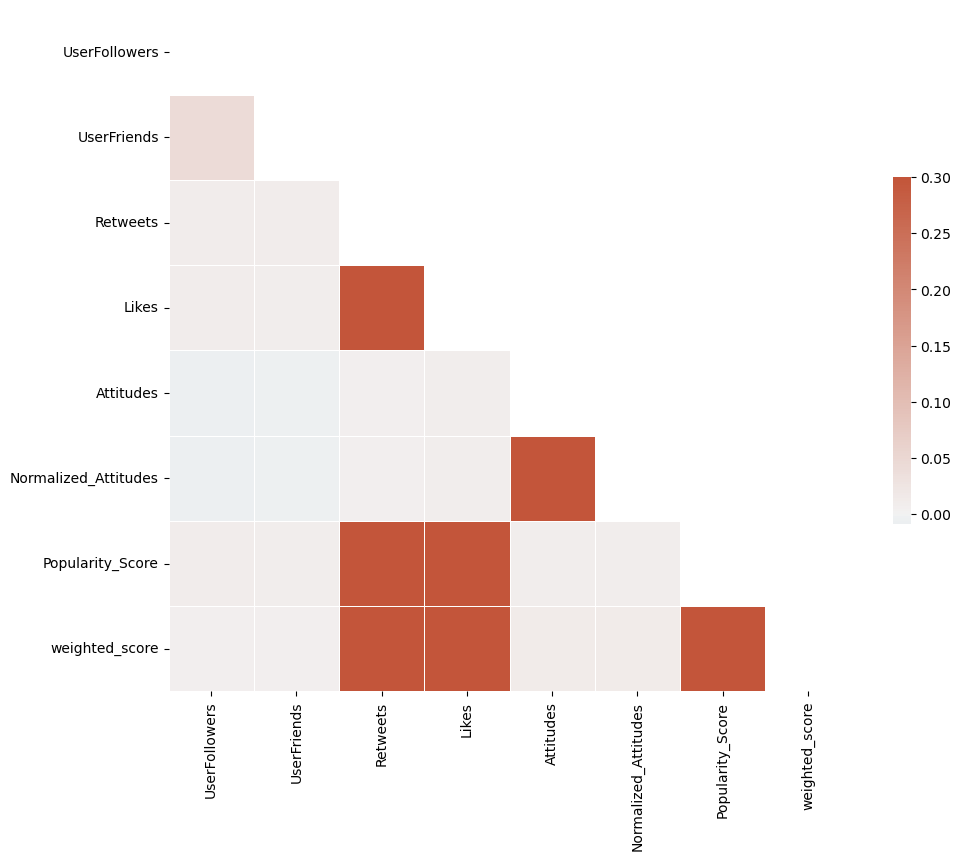

In [44]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Lets see if things change if we remove tweets with links

In [ ]:
max_value = df['weighted_score'].max()
max_value_row = df[df['weighted_score'] == max_value]

print(max_value_row['Tweet'].values)


In [78]:
#Try removing tweets with links to avoid advertising
url_pattern = re.compile(r'https?://(?!twitter\.com)\S+|www\.(?!twitter\.com)\S+')

# Filter out entries containing URLs
df_f = df[~df['Tweet'].str.contains(url_pattern)]

max_value = df_f['weighted_score'].max()
max_value_row = df_f[df_f['weighted_score'] == max_value]

df_f.head()

,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Attitudes,AttitudeClass,Normalized_Attitudes,Normalized_Attitude_Class,Month_Year,Popularity_Score,weighted_score,residuals,normalized_weighted_score
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0.0,0.000000,Neutral,0.500000,Neutral,2023-04,0.0,0.0,-0.065082,0.500000
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2.0,0.200000,Positive,0.600000,Positive,2023-04,1.0,0.6,0.034901,0.600000
6,2023-04-08,Trying to stop students from using #AI and #ch...,https://twitter.com/Sherab_Taye/status/1644542...,Sherab_Taye,2010-05-10 12:40:40+00:00,False,338.0,53.0,0.0,0.0,0.100000,Positive,0.550000,Positive,2023-04,0.0,0.0,-0.015082,0.550000
21,2023-04-08,"well, #ChatGPT made me change my idea of not g...",https://twitter.com/VALIPOKKANN/status/1644539...,VALIPOKKANN,2022-08-08 10:06:11+00:00,False,732.0,363.0,0.0,0.0,-0.041667,Negative,0.479167,Negative,2023-04,0.0,0.0,-0.085915,0.479167
22,2023-04-08,@AlisynCamerota \n\nTLDR is one of the best th...,https://twitter.com/bufocalvin/status/16445392...,bufocalvin,2009-12-26 01:28:37+00:00,False,3642.0,4992.0,0.0,0.0,1.000000,Positive,1.000000,Positive,2023-04,0.0,0.0,0.434918,1.000000


In [55]:
print("Difference in amount of tweets with links and tweets with no links: " + str(len(df)- len(df_f)))

Difference in amount of tweets with links and tweets with no links: 318039


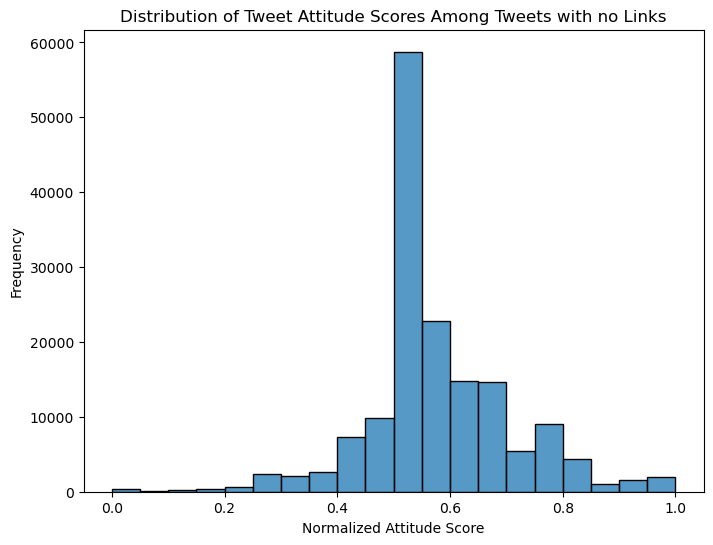

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df_f['Normalized_Attitudes'], bins=20)
plt.xlabel('Normalized Attitude Score')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Attitude Scores Among Tweets with no Links')
plt.show()


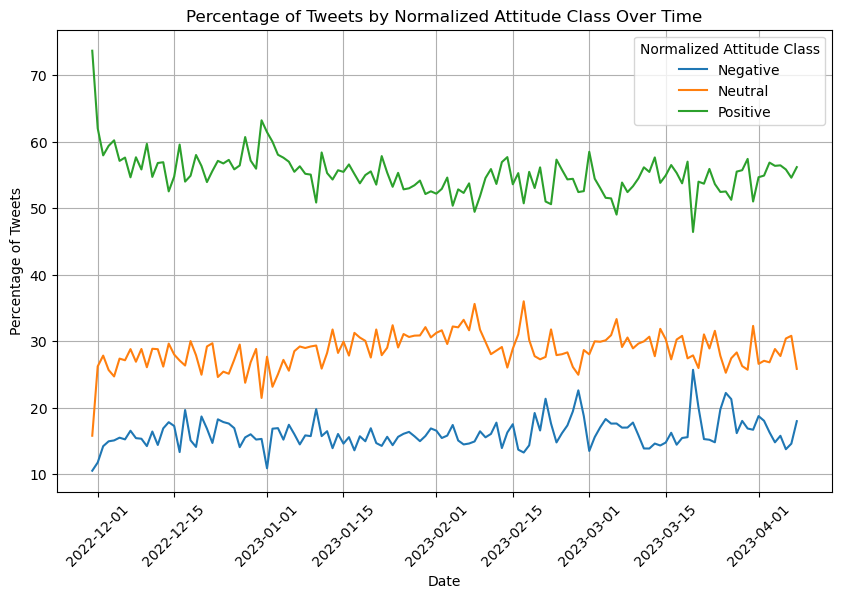

In [58]:
# Group by date and attitude class, then count the tweets
tweets_by_date_attitude = df_f.groupby(['Date', 'Normalized_Attitude_Class'])['Tweet'].count().unstack()

# Calculate the total number of tweets per day
daily_total_tweets = tweets_by_date_attitude.sum(axis=1)

# Calculate the percentage of tweets for each attitude class
tweets_percentage_by_date_attitude = tweets_by_date_attitude.div(daily_total_tweets, axis=0) * 100

# Create a line chart of the percentage of tweets by attitude class over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_percentage_by_date_attitude)
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.title("Percentage of Tweets by Normalized Attitude Class Over Time")
plt.xticks(rotation=45)

plt.legend(['Negative', 'Neutral', 'Positive'], title='Normalized Attitude Class')
plt.grid()
plt.show()

## Quantify difference so we can compare apples to apples

### Scatter Plot of Weighted Scores Without Links

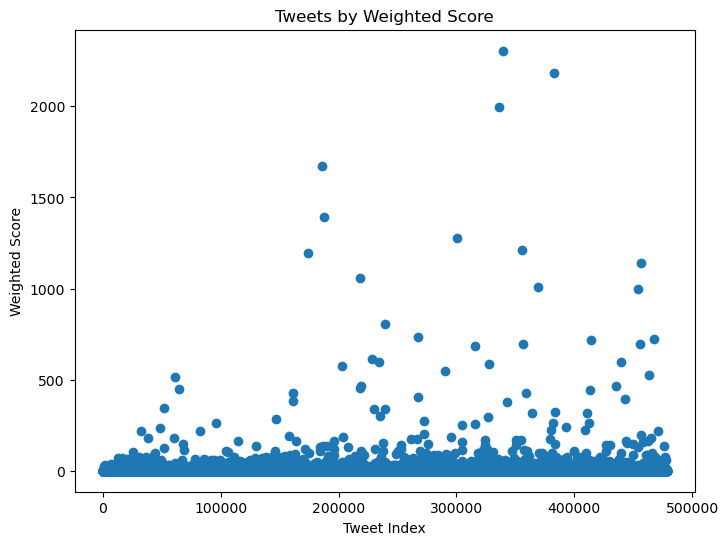

In [81]:
# Plot tweets by weighted score
plt.figure(figsize=(8, 6))
plt.scatter(df_f.index, df_f['weighted_score'])
plt.xlabel('Tweet Index')
plt.ylabel('Weighted Score')
plt.title('Tweets by Weighted Score')
plt.show()

## Is there are correlation between popularity and sentiment?

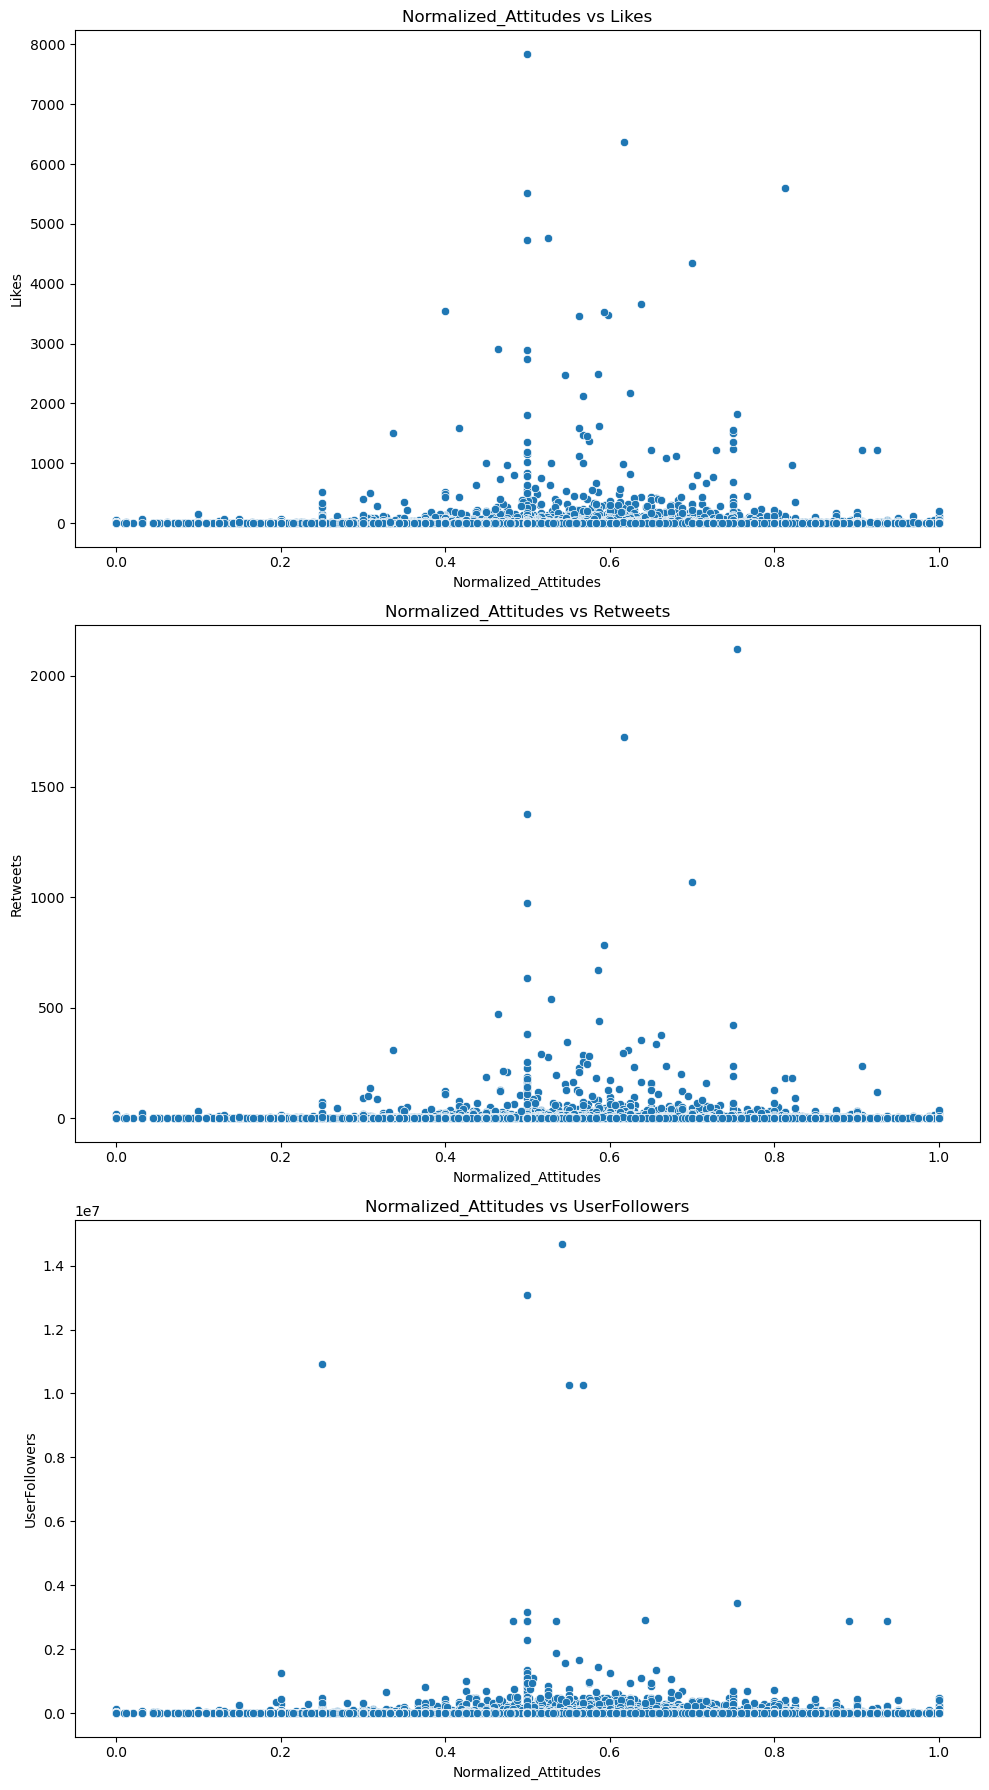

In [94]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Scatter plot for Normalized_Attitudes and Likes
sns.scatterplot(x='Normalized_Attitudes', y='Likes', data=df_f, ax=axs[0])
axs[0].set_title('Normalized_Attitudes vs Likes')

# Scatter plot for Normalized_Attitudes and Retweets
sns.scatterplot(x='Normalized_Attitudes', y='Retweets', data=df_f, ax=axs[1])
axs[1].set_title('Normalized_Attitudes vs Retweets')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.scatterplot(x='Normalized_Attitudes', y='UserFollowers', data=df_f, ax=axs[2])
axs[2].set_title('Normalized_Attitudes vs UserFollowers')

plt.tight_layout()
plt.show()